In [1]:
import matplotlib.pyplot as plt
img = plt.imread(r'Cat_Pic.png') 
plt.imshow(img)        # show the picture
print(img)             # print img list, RGBA (RGB + Alpha)
img.shape              # print the size of the picture

[[[0.23921569 0.28235295 0.27058825 1.        ]
  [0.19607843 0.2509804  0.23921569 1.        ]
  [0.4117647  0.49803922 0.46666667 1.        ]
  ...
  [0.56078434 0.5411765  0.4392157  1.        ]
  [0.6156863  0.6        0.5019608  1.        ]
  [0.49411765 0.4627451  0.4        1.        ]]

 [[0.68235296 0.7294118  0.72156864 1.        ]
  [0.74509805 0.8        0.7921569  1.        ]
  [0.6666667  0.70980394 0.69803923 1.        ]
  ...
  [0.29411766 0.28627452 0.22352941 1.        ]
  [0.44705883 0.4392157  0.39215687 1.        ]
  [0.5058824  0.48235294 0.4392157  1.        ]]

 [[0.46666667 0.5176471  0.5176471  1.        ]
  [0.46666667 0.5137255  0.5058824  1.        ]
  [0.3882353  0.42745098 0.42745098 1.        ]
  ...
  [0.12156863 0.10196079 0.08235294 1.        ]
  [0.0627451  0.05098039 0.03921569 1.        ]
  [0.04705882 0.03529412 0.02745098 1.        ]]

 ...

 [[0.3019608  0.3019608  0.22352941 1.        ]
  [0.31764707 0.3254902  0.24313726 1.        ]
  [0.32549

(199, 149, 4)

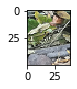

In [2]:
fig = plt.figure(2,figsize = (1.5,1))
small = img[:50, :40, :] # top left corner
plt.imshow(small)
plt.imsave(r'small.png',small)

array([[0.28235295, 0.2509804 , 0.49803922, ..., 0.5411765 , 0.6       ,
        0.4627451 ],
       [0.7294118 , 0.8       , 0.70980394, ..., 0.28627452, 0.4392157 ,
        0.48235294],
       [0.5176471 , 0.5137255 , 0.42745098, ..., 0.10196079, 0.05098039,
        0.03529412],
       ...,
       [0.3019608 , 0.3254902 , 0.3254902 , ..., 0.5411765 , 0.5568628 ,
        0.4745098 ],
       [0.37254903, 0.52156866, 0.4745098 , ..., 0.5568628 , 0.53333336,
        0.5764706 ],
       [0.16078432, 0.14509805, 0.2784314 , ..., 0.72156864, 0.70980394,
        0.6745098 ]], dtype=float32)

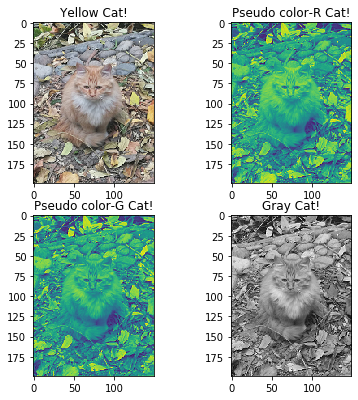

In [3]:
plt.figure(2,figsize = (6.5,6.5))
plt.subplot(2,2,1)
plt.title('Yellow Cat!')
plt.imshow(img)
plt.subplot(2,2,2)
plt.title('Pseudo color-R Cat!')
img_r = img[:,:,0] # single channel (R), pseudo color
plt.imshow(img_r)
plt.subplot(2,2,3)
plt.title('Pseudo color-G Cat!')
img_r1 = img[:,:,1] # single channel (G), pseudo color
plt.imshow(img_r1)
plt.subplot(2,2,4)
plt.title('Gray Cat!')
img_r2 = img[:,:,2] # single channel (B), add gray scale
plt.imshow(img_r2, plt.cm.gray)
img_r1

In [4]:
img_r1.shape

(199, 149)

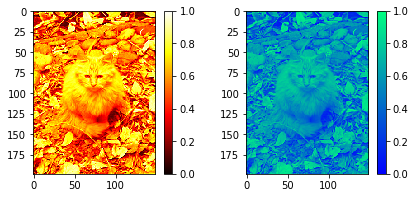

In [5]:
plt.figure(3,(7,3))
plt.subplot(1,2,1)
plt.imshow(img_r, cmap="hot")      # bg color, hot style
plt.colorbar()                     
plt.subplot(1,2,2)
plt.imshow(img_r, cmap="winter")   # bg color, cold style
plt.colorbar()                     

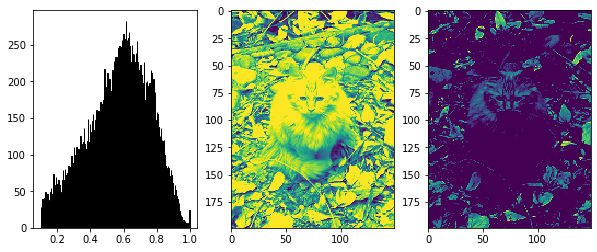

In [6]:
plt.figure(3,figsize=(10,4))
plt.subplot(1,3,1)
# 'ravel' similar to 'flatten'
plt.hist(img_r.ravel(), bins=256, range=(0.1, 1.0), facecolor='k', edgecolor='k')
# statistics for the range 0.1 - 10
plt.subplot(1,3,2)
plt.imshow(img_r, clim=(0.1, 0.7))    
# extract 0.1 - 0.7
plt.subplot(1,3,3)
plt.imshow(img_r, clim=(0.7,1))       
# extract 0.7 - 1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


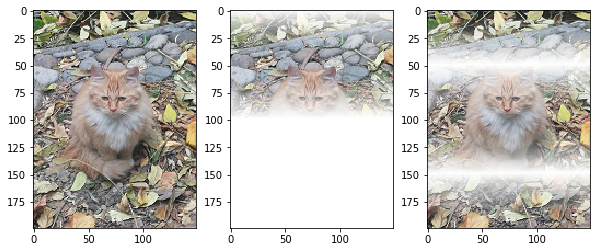

In [10]:
import numpy as np
plt.figure(3,figsize = (10,4))
plt.subplot(1,3,1)
plt.imshow(img)      
#===========================================================================
img_a = img.copy()                      # to change alpha, we need a copy
line_length = img_a.shape[0] * img_a.shape[1] # get the no. of pixel and chenge their value
aline_value = np.linspace(0,2 * np.pi,line_length,dtype = 'float32') 
# change alpha to the type of float32
aling_sin_y = np.sin(aline_value)
np.place(img_a,img_a == 1,aling_sin_y)  # replace alpha values
plt.subplot(1,3,2)
plt.imshow(img_a)    
#===========================================================================
plt.subplot(1,3,3)
aling_cos_y = np.abs(np.cos(aline_value))  # abs
y_normed = aling_cos_y / aling_cos_y.max() # normalization to [0,1]
img_a1 = img.copy()
np.place(img_a1,img_a1 == 1,y_normed)   # replace alpha values
plt.imshow(img_a1)

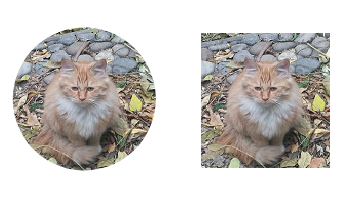

In [11]:
import matplotlib.patches as patches
# patches control the shape of image
fig = plt.figure(4)
ax = fig.add_subplot(121)
im = plt.imshow(img)
patch = patches.Circle((75, 90), radius = 70, transform = ax.transData) 
# cut the img to a circle
im.set_clip_path(patch)                                            
ax.axis('off')                                      
#=================================================================
ax1 = fig.add_subplot(122)
im1 = plt.imshow(img)
patch1 = patches.Rectangle((10, 25),126,132,transform = ax1.transData)
# cut the img to a rectangle
im1.set_clip_path(patch1)                                       
ax1.axis('off')                                                 
plt.show()

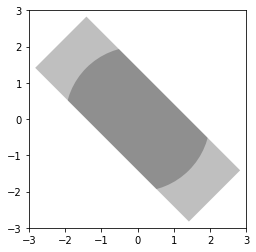

In [12]:
from matplotlib.transforms import Affine2D

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, aspect='equal')

rotation = Affine2D().rotate_deg(45) + ax.transData

c = patches.Circle((0, 0), radius=2, fc='k', ec='none', alpha=.25)
c.set_transform(rotation)
ax.add_patch(c)
r = patches.Rectangle((-1, -3), 2, 6, fc='k', ec='none', alpha=.25)

#  Here we transform the rectangle into a regular path patch
path = r.get_path()
transform = r.get_transform()
path = transform.transform_path(path)
r = patches.PathPatch(path, fc='k', ec='none', alpha=.25)

r.set_transform(rotation)
ax.add_patch(r)
c.set_clip_path(r)

ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)

plt.show()

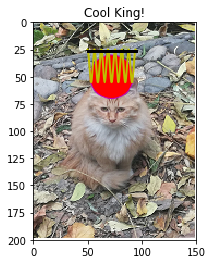

In [15]:
img1 = img.copy()
fig = plt.figure()
# x,y = img1[:,:,0].shape
x = np.linspace(50,np.pi * 30,1000)
y = np.sin(5 + x) * 15 + 40
ax = fig.add_subplot(111,aspect = 'equal')
# plot the curve
ax.plot(x,y,lw = 2,color='y') # marker='o'
# add the circle
C1 = patches.Circle(xy = (72,50),radius = 20,alpha = 1,edgecolor = 'm',facecolor = 'r')
ax.add_patch(C1)
plt.imshow(img1)
# plot the line
ax.plot([50,94],[26,26],lw = 3,color = 'k') 
# ax.axis('off') 
ax.set_xlim(0,150)
ax.set_ylim(200,0)
plt.title('Cool King!')
plt.show()